# Synthetic Data Test

Importing packages:

In [25]:
from __future__ import print_function, division
from PyAstronomy import pyasl
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from astropy.convolution import convolve
import scipy

Reading in the data and adjusting the txt file:

In [2]:
df = pd.read_csv("xx03",delim_whitespace=True)
df = df.rename_axis("sourceId 57500450000")
df = df.rename(columns= {"sourceId": "wavelength", "57500450000": "flux"})
df

,wavelength,flux
sourceId 57500450000,,
0,840.000,47622.0
1,840.001,47622.0
2,840.002,47622.0
3,840.003,47622.0
4,840.004,47622.0
...,...,...
49996,889.996,41082.0
49997,889.997,41198.0
49998,889.998,41379.0


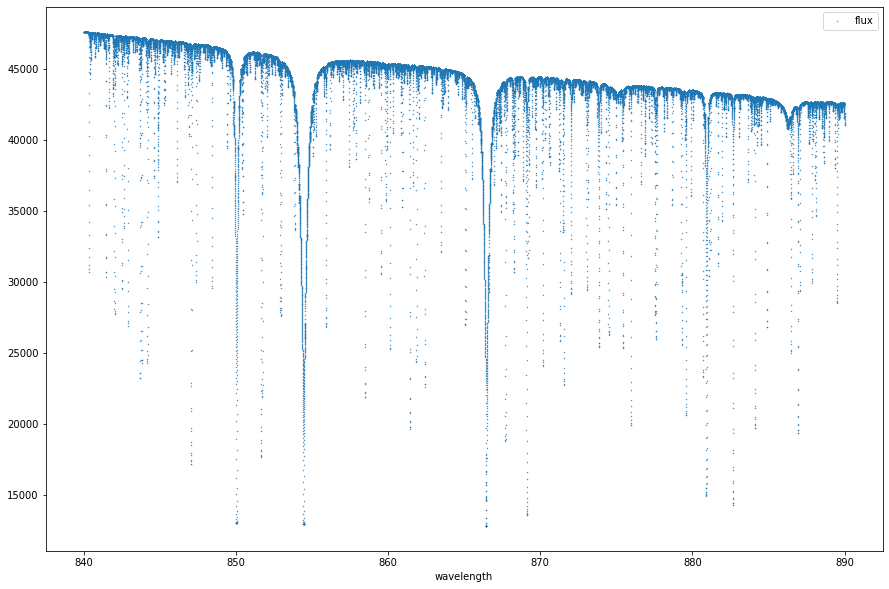

In [3]:
df.plot(style='.',x='wavelength',y='flux',ms=0.8, figsize=(15,10))
plt.show()
# syntheic template

Creating templates:

In [4]:
# Template wavelength and flux
tw = df['wavelength']
tf = df['flux']

# Template 2 (same as sample template)
dw = df['wavelength']
dfl = df['flux']

In [5]:
sig_rvs=(860.5/11500.)/2.35482 # 2.35.. conversion
sig_rvs
#FWHM - 11500 is resuolution: relation between FWHM and sigma of Gaussian

0.03177571404885372

---

From here onwards, this follows normspec.pro file translated from IDL to Python:

In [6]:
n = df['flux'].size
print(n)

50001


In [7]:
x1 = 25
x2 = n-1-25
print(x1)
print(x2)

25
49975


In [8]:
y1 = np.median(df['flux'][0:51])
y2 = np.median(df['flux'][-51:-1])
print(y1)
print(y2)

47619.0
42198.5


In [9]:
a = tf[0] #In Python, first term is from index 0
print(a)

47622.0


In [10]:
# Gradient
b = (y2-y1)/(x2-x1)
print(b)

-0.10851851851851851


In [11]:
linear_flux = np.zeros((n),float) # I got this command from an IDL to Python translater, I am assuming that we are just filling an array of zeros.
linear_flux

array([0., 0., 0., ..., 0., 0., 0.])

For loop: for every index in a range from 0 to n-1, linear flux follows the equation stated:

In [12]:
for i in range(0,n-1):
    linear_flux[i] = a + (b*i)
print(linear_flux)

[47622.         47621.89148148 47621.78296296 ... 42196.29111111
 42196.18259259     0.        ]


I am guessing this next line normalises the sources (but the results show an approximate to unity, not unity exactly - this is ok?)

In [13]:
norm_flux_array = tf/linear_flux
norm_flux_array

sourceId 57500450000
0        1.000000
1        1.000002
2        1.000005
3        1.000007
4        1.000009
           ...   
49996    0.973588
49997    0.976339
49998    0.980631
49999    0.985753
50000         inf
Name: flux, Length: 50001, dtype: float64

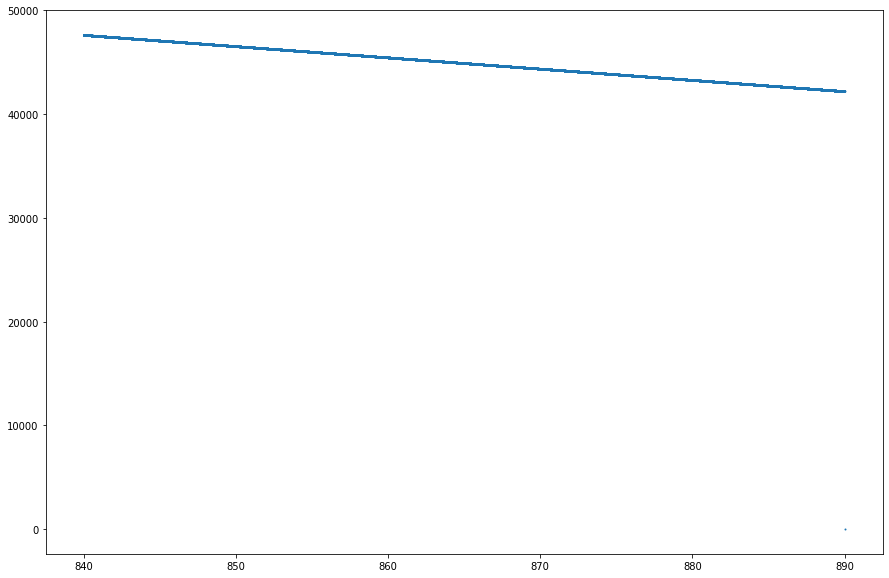

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(tw, linear_flux, s=1)
plt.show()


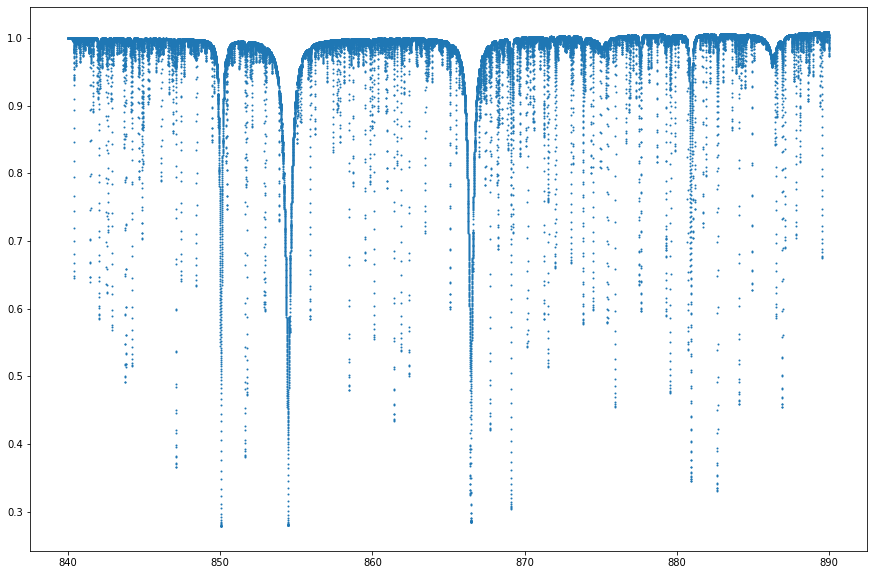

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(tw, norm_flux_array, s=1)
plt.show()

---

Convolving with a Gaussian LSF

In [ ]:
gauss1d = scipy.ndimage.gaussian_filter1d(df['flux'],sig_rvs)

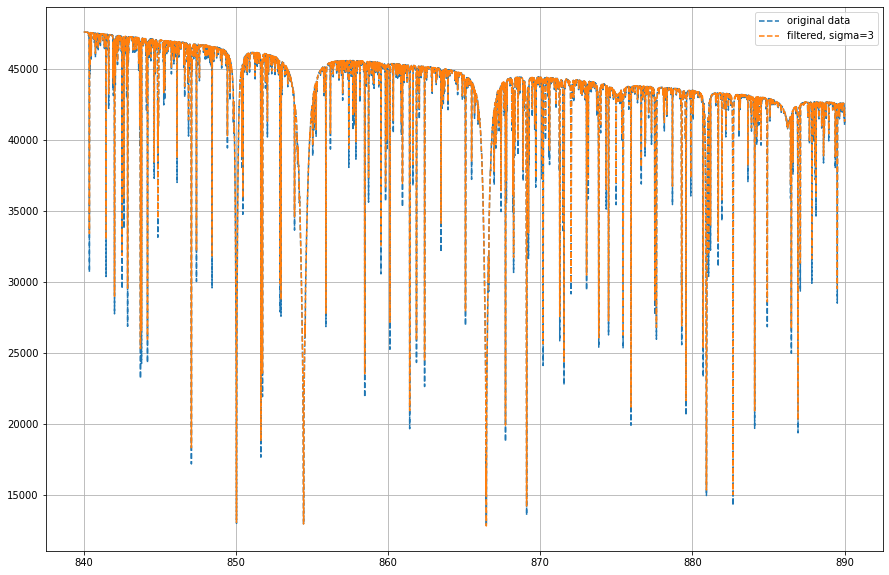

In [19]:
plt.figure(figsize=(15,10))
plt.plot(tw,tf, '--', label='original data')
plt.plot(tw,gauss1d, '--', label='filtered, sigma=3')
plt.legend()
plt.grid()
plt.show()

In [35]:
rv, cc = pyasl.crosscorrRV(tw,gauss1d,tw,tf,-1000.,1000.,1.,mode='doppler', skipedge=0)

KeyError: -1

In [28]:
print(gauss1d)
print(tf)

[47621.90137344 47621.86469936 47621.79278104 ... 41399.9214616
 41442.0681151  41467.6778464 ]
sourceId 57500450000
0        47622.0
1        47622.0
2        47622.0
3        47622.0
4        47622.0
          ...   
49996    41082.0
49997    41198.0
49998    41379.0
49999    41595.0
50000    41816.0
Name: flux, Length: 50001, dtype: float64
